<a href="https://colab.research.google.com/github/Ibra8000/ARABIC-OCR/blob/master/Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
#Feature Selection Methods
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import GenericUnivariateSelect, chi2
#Split data to train and test
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

In [3]:

# dataset_digit = pd.read_csv("/content/drive/MyDrive/Final_project/Digit Dataset With Lable.csv")
# print(dataset_digit.head())


X = pd.read_csv("/content/drive/MyDrive/Final_project/Features.csv")
y = pd.read_csv("/content/drive/MyDrive/Final_project/Target.csv")

In [ ]:
X.describe()


In [ ]:
y.describe()


In [11]:

# Feature Selection
transformer = GenericUnivariateSelect(chi2, 'k_best', param=100)
X_new = transformer.fit_transform(X, y)

X_new.shape

transformer.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,

In [35]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42, stratify=y)

In [36]:
from xgboost import XGBClassifier

In [37]:
model = XGBClassifier()
model.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

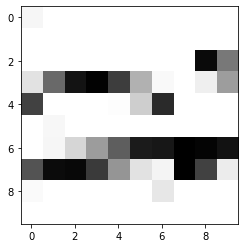

In [38]:
import matplotlib.pyplot as plt

# Load the rotate image library
import scipy
from scipy import ndimage
import numpy as np
from numpy import flipud
image_index = 29

pic = plt.imshow(X_test[image_index].reshape(10, 10),cmap='Greys')


In [39]:
y_pred=model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.23%
